<a href="https://colab.research.google.com/github/DhanushDhanasekaran/NullClass-Data-Analysis/blob/main/Tweet_Engagement_Scatter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

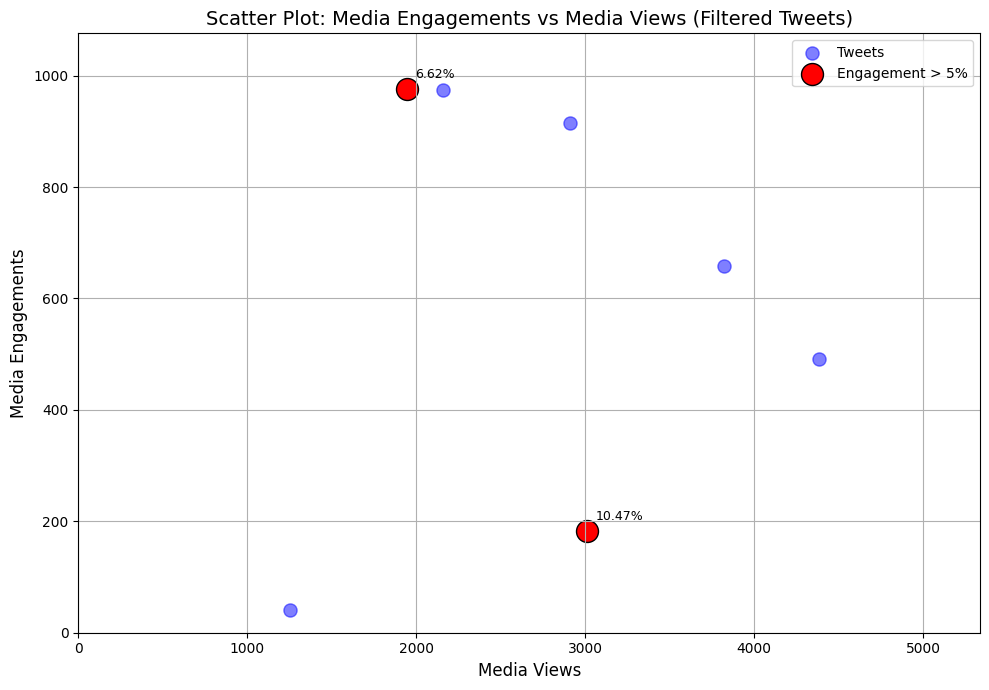

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

# Generate a bigger synthetic dataset
np.random.seed(42)
num_tweets = 50

data = {
    "tweet_date": np.random.randint(1, 31, num_tweets),  # random days in month
    "tweet_time": [f"{random.randint(17,23)}:{random.randint(0,59):02d}" for _ in range(num_tweets)],
    "replies": np.random.randint(5, 40, num_tweets),
    "word_count": np.random.randint(20, 100, num_tweets),
    "engagement_rate": np.round(np.random.uniform(1, 12, num_tweets), 2),
    "media_views": np.random.randint(100, 5000, num_tweets),
    "media_engagements": np.random.randint(20, 1000, num_tweets)
}
df = pd.DataFrame(data)

# Convert tweet_time to datetime.time
df['tweet_time'] = pd.to_datetime(df['tweet_time'], format="%H:%M").dt.time

# Apply filters
df_filtered = df[
    (df['replies'] > 10) &
    (df['word_count'] > 50) &
    (df['tweet_date'] % 2 == 1) &  # odd dates
    (df['tweet_time'] >= datetime.strptime("18:00", "%H:%M").time()) &
    (df['tweet_time'] <= datetime.strptime("23:00", "%H:%M").time())
]

# Plot scatter
plt.figure(figsize=(10,7))
plt.scatter(df_filtered['media_views'], df_filtered['media_engagements'],
            color='blue', s=90, alpha=0.5, label="Tweets")

# Highlight high engagement rate > 5%
highlight = df_filtered[df_filtered['engagement_rate'] > 5]
plt.scatter(highlight['media_views'], highlight['media_engagements'],
            color='red', s=250, marker='o', edgecolors='black', label="Engagement > 5%")

# Annotate highlighted tweets with engagement %
for i, row in highlight.iterrows():
    plt.text(row['media_views']+50, row['media_engagements']+20,
             f"{row['engagement_rate']}%", fontsize=9, color='black')

# Labels and formatting
plt.xlabel("Media Views", fontsize=12)
plt.ylabel("Media Engagements", fontsize=12)
plt.title("Scatter Plot: Media Engagements vs Media Views (Filtered Tweets)", fontsize=14)
plt.legend()
plt.grid(True)

# Extend axis for clarity
plt.xlim(0, df['media_views'].max() + 500)
plt.ylim(0, df['media_engagements'].max() + 100)

# Save and show
plt.tight_layout()
plt.savefig("tweet_media_scatter_highlighted_extended.png", dpi=300)
plt.show()
